In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Vanishing OR Exploding Gradients Problem - Saturating means no achievable increase
- Backpropagation uses these gradients to update each parameter with a Gradient Descent step.
- Gradients often get smaller and smaller as the algorithm progresses down to the lower layers leaving lower connection layers virtually unchanged hence the training never converges. this is called Vanishing gradients.
- Exploding gradients is when the gradients can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges.

In [2]:
def logit(z):
    return 1 /  (1 + np.exp(-z))

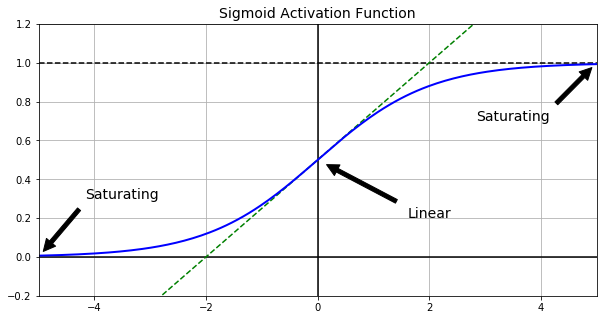

In [3]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5,5,200)

plt.figure(figsize=(10,5))
plt.plot([-5,5],[0,0], 'k-')
plt.plot([-5,5],[1,1], 'k--')
plt.plot([0,0], [-0.2,1.2], 'k-')
plt.plot([-5,5],[-3/4,7/4], 'g--')
plt.plot (z, logit(z),'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating',xytext=(3.5,0.7), xy=(5,1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5,0),arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2,0.2), xy=(0,0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title('Sigmoid Activation Function', fontsize=14)
plt.axis([-5,5,-0.2,1.2])
plt.show()

# Xavier  Initialization and He Initialization
- Glorot and Bengio propose a way to significantly alleviate this problem. We need the signal to flow properly in both directions: in the forward direction when making predictions, and in the reverse direction when backpropagating gradients. 
- We need the variance of the outputs of each layer to be equal to the variance of its inputs and we also need the gradients to have equal variance before and after flowing through a layer in the reverse direction.
- The connection weights must be initialized randomly,Xavier initialization uses a uniform distribution.
- He Initialization uses a varaince scaling initializer which only considers "FAN-IN" and not the average between "FAN-IN" and "FAN-OUT" like in Xavier initialization but you can change this by setting the argument mode="FAN_AVG".

In [4]:
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    np.random.seed(seed)

In [5]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [6]:
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(300, kernel_initializer='glorot_uniform', bias_initializer='zeros',activation='relu', name='hidden_1')(inputs)
x = layers.Dense(100, kernel_initializer='glorot_uniform',bias_initializer='zeros',activation='relu', name='hidden_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000, 784).astype('float32') /  255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['sparse_categorical_accuracy'])

In [9]:
print('Fit model on training data')
history = model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.2)

Fit model on training data
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 10s 198us/sample - loss: 0.3477 - sparse_categorical_accuracy: 0.9013 - val_loss: 0.1754 - val_sparse_categorical_accuracy: 0.9477
Epoch 2/3
48000/48000 [==============================] - 6s 130us/sample - loss: 0.1462 - sparse_categorical_accuracy: 0.9572 - val_loss: 0.1280 - val_sparse_categorical_accuracy: 0.9622
Epoch 3/3
48000/48000 [==============================] - 5s 107us/sample - loss: 0.1002 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1026 - val_sparse_categorical_accuracy: 0.9695


In [10]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.3477322323053765, 0.14623250887185957, 0.10016569173846317], 'sparse_categorical_accuracy': [0.90129167, 0.95720834, 0.97075], 'val_loss': [0.1753580312865476, 0.12802170872261437, 0.10263044861785602], 'val_sparse_categorical_accuracy': [0.94775, 0.96216667, 0.9695]}


In [11]:
print('\nEvaluate on test data')
results = model.evaluate(x_test, y_test)


Evaluate on test data
10000/10000 [==============================] - 1s 108us/sample - loss: 0.1027 - sparse_categorical_accuracy: 0.9672


# He Initialization using Variance Scaling Initializer

In [12]:
from tensorflow.keras import initializers
reset_graph()
he_init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_initializer=he_init, activation = 'relu',input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, kernel_initializer=he_init, activation = 'relu'), 
  tf.keras.layers.Dense(units = 10, name='predictions') 
])

In [13]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['sparse_categorical_accuracy'])

In [14]:
print('Fit model on training data')
history = model.fit(x_train, y_train, batch_size=50,epochs=3, validation_split=0.2)

Fit model on training data
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3651 - sparse_categorical_accuracy: 0.8934 - val_loss: 0.1988 - val_sparse_categorical_accuracy: 0.9423
Epoch 2/3
48000/48000 [==============================] - 5s 95us/sample - loss: 0.1483 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.1220 - val_sparse_categorical_accuracy: 0.9657
Epoch 3/3
48000/48000 [==============================] - 5s 97us/sample - loss: 0.1022 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1053 - val_sparse_categorical_accuracy: 0.9692


In [15]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.36513318088448915, 0.14827217614122976, 0.10217837591674955], 'sparse_categorical_accuracy': [0.89339584, 0.95677084, 0.96958333], 'val_loss': [0.19882921108122295, 0.12196524912821284, 0.10531205032408858], 'val_sparse_categorical_accuracy': [0.94233334, 0.96566665, 0.9691667]}


In [16]:
print('Evaluate on the test data')
results = model.evaluate(x_test, y_test)

Evaluate on the test data
10000/10000 [==============================] - 1s 100us/sample - loss: 0.0993 - sparse_categorical_accuracy: 0.9702


# Nonsaturating Activation Functions
- The ReLU activation function is not perfect. It suffers from a problem known as the dying ReLUs: during training, some neurons effectively die meaning they stop outputting anything other than 0.

## Leaky ReLu

In [17]:
# Alpha defines how much a hyperparameter leaks.
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z,z)

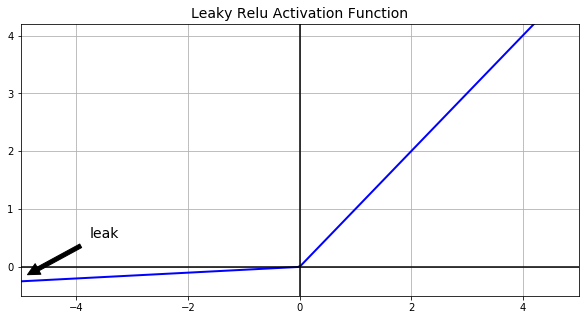

In [18]:
plt.figure(figsize=(10,5))
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5,5],[0,0], 'k-')
plt.plot([0,0],[-0.5,4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('leak', xytext=(-3.5, 0.5), xy=(-5,-0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky Relu Activation Function', fontsize=14)
plt.axis([-5,5, -0.5,4.2])
plt.show()

In [19]:
reset_graph()
LR = tf.keras.layers.LeakyReLU(alpha=0.01)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_initializer=he_init, activation = LR,input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, kernel_initializer=he_init, activation = LR), 
  tf.keras.layers.Dense(units = 10, name='predictions') 
])

In [20]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),#  Used to get integer targets.
             metrics=['sparse_categorical_accuracy'])

In [21]:
print('\nFit model on training data')
model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.2)


Fit model on training data
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3737 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.1793 - val_sparse_categorical_accuracy: 0.9497
Epoch 2/3
48000/48000 [==============================] - 5s 102us/sample - loss: 0.1567 - sparse_categorical_accuracy: 0.9529 - val_loss: 0.1272 - val_sparse_categorical_accuracy: 0.9622
Epoch 3/3
48000/48000 [==============================] - 5s 100us/sample - loss: 0.1041 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.1022 - val_sparse_categorical_accuracy: 0.9701


In [22]:
print('\History Dict: ', history.history)

\History Dict:  {'loss': [0.36513318088448915, 0.14827217614122976, 0.10217837591674955], 'sparse_categorical_accuracy': [0.89339584, 0.95677084, 0.96958333], 'val_loss': [0.19882921108122295, 0.12196524912821284, 0.10531205032408858], 'val_sparse_categorical_accuracy': [0.94233334, 0.96566665, 0.9691667]}


In [23]:
print('\nEvaluation of the model with test data')
results = model.evaluate(x_test, y_test)


Evaluation of the model with test data
10000/10000 [==============================] - 1s 93us/sample - loss: 0.0960 - sparse_categorical_accuracy: 0.9697


In [24]:
reset_graph()
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#Reserve 10000 samples for Validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, activation = 'relu'), 
  tf.keras.layers.Dense(units = 10, name='predictions') 
])

In [26]:
# Optimizer, loss function and metrics
optimizer = keras.optimizers.SGD(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [27]:
#Preparing the training dataset.
batch_size = 50
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

#Preparing validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [28]:
epochs=5
for epoch in range (epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits  = model(x_batch_train)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
            
    train_acc_metric(y_batch_train, logits)
            
    if step % 5 == 0:
        print('Training Loss',(step, float(loss_value)))
    train_acc = train_acc_metric.result()
    print('Training Accuracy: ',(float(train_acc),))
    train_acc_metric.reset_states()
    
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val)
        val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation Accuracy: ',(float(val_acc),))

Training Accuracy:  (0.8399999737739563,)
Validation Accuracy:  (0.9027000069618225,)
Training Accuracy:  (0.8600000143051147,)
Validation Accuracy:  (0.919700026512146,)
Training Accuracy:  (0.9399999976158142,)
Validation Accuracy:  (0.932699978351593,)
Training Accuracy:  (0.9399999976158142,)
Validation Accuracy:  (0.9387999773025513,)
Training Accuracy:  (0.9200000166893005,)
Validation Accuracy:  (0.9431999921798706,)


# Exponential Linear Units - ELU
- Negative values when z < 0, which allows the unit to have an average output closer to 0. This helps alleviate the vanishing gradients problem.
- The main drawback of the ELU activation function is that it is slower to compute than the ReLU and its variants due to the use of the exponential function but during training this is compensated by the faster convergence rate.

In [29]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) -1), z)

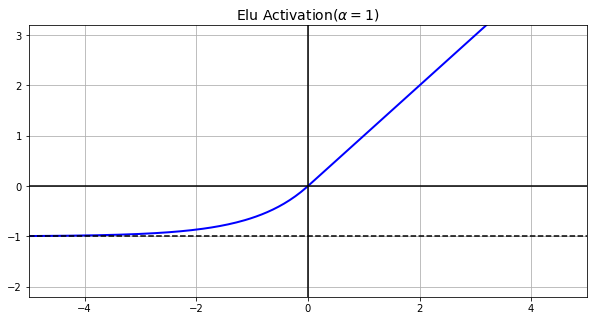

In [30]:
plt.figure(figsize=(10,5))
plt.plot(z, elu(z), 'b-', linewidth=2)
plt.plot([-5,5], [0,0], 'k-')
plt.plot([-5,5], [-1,-1], 'k--')
plt.plot([0,0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'Elu Activation($\alpha=1$)', fontsize=14)
plt.axis([-5,5, -2.2, 3.2])
plt.show()

In [31]:
EL = tf.keras.layers.ELU(alpha=1.0)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation = EL,input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation = EL), 
  tf.keras.layers.Dense(units = 10, name='predictions') 
])

In [32]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),#  Used to get integer targets.
             metrics=['sparse_categorical_accuracy'])

In [33]:
print('\nFit model on training data')
model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.2)


Fit model on training data
Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 5s 121us/sample - loss: 0.3710 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.2736 - val_sparse_categorical_accuracy: 0.9172
Epoch 2/3
40000/40000 [==============================] - 4s 107us/sample - loss: 0.2018 - sparse_categorical_accuracy: 0.9406 - val_loss: 0.2063 - val_sparse_categorical_accuracy: 0.9356
Epoch 3/3
40000/40000 [==============================] - 4s 109us/sample - loss: 0.1472 - sparse_categorical_accuracy: 0.9572 - val_loss: 0.1669 - val_sparse_categorical_accuracy: 0.9481


In [34]:
print('\History Dict: ', history.history)

\History Dict:  {'loss': [0.36513318088448915, 0.14827217614122976, 0.10217837591674955], 'sparse_categorical_accuracy': [0.89339584, 0.95677084, 0.96958333], 'val_loss': [0.19882921108122295, 0.12196524912821284, 0.10531205032408858], 'val_sparse_categorical_accuracy': [0.94233334, 0.96566665, 0.9691667]}


In [35]:
print('\nEvaluation of the model with test data')
results = model.evaluate(x_test, y_test)


Evaluation of the model with test data
10000/10000 [==============================] - 1s 103us/sample - loss: 0.1375 - sparse_categorical_accuracy: 0.9571


# Scaled Exponential Linear Unit - SELU
- A neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training which solves the vanishing/exploding gradients problem.

In [36]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [37]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

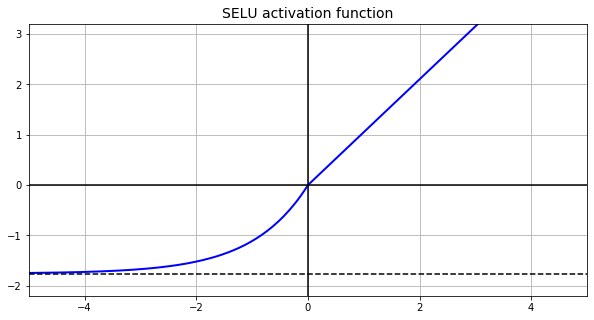

In [38]:
plt.figure(figsize=(10,5))
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [39]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'selu' ,input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, activation = 'selu'), 
  tf.keras.layers.Dense(units = 10, name='predictions') 
])

In [41]:
# Optimizer, loss function and metrics
optimizer = keras.optimizers.SGD(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [42]:
#Preparing the training dataset.
batch_size = 50
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

#Preparing validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [43]:
epochs=3
for epoch in range (epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits  = model(x_batch_train)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
            
    train_acc_metric(y_batch_train, logits)
            
    if step % 5 == 0:
        print('Training Loss',(step, float(loss_value)))
    train_acc = train_acc_metric.result()
    print('Training Accuracy: ',(float(train_acc),))
    train_acc_metric.reset_states()
    
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val)
        val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation Accuracy: ',(float(val_acc),))

Training Accuracy:  (0.9399999976158142,)
Validation Accuracy:  (0.911899983882904,)
Training Accuracy:  (0.9800000190734863,)
Validation Accuracy:  (0.9222000241279602,)
Training Accuracy:  (0.8799999952316284,)
Validation Accuracy:  (0.9275000095367432,)


In [44]:
#Using SELU and LeCun intialization
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_initializer='lecun_normal', activation = 'selu' ,input_shape = (784,)),
  tf.keras.layers.Dense(units = 100, kernel_initializer='lecun_normal', activation = 'selu'), 
  tf.keras.layers.Dense(units = 10, activation='softmax', name='predictions') 
])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
predictions (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['sparse_categorical_accuracy'])

In [47]:
model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 5s 118us/sample - loss: 1.6494 - sparse_categorical_accuracy: 0.8416 - val_loss: 1.5771 - val_sparse_categorical_accuracy: 0.8982
Epoch 2/3
40000/40000 [==============================] - 4s 101us/sample - loss: 1.5578 - sparse_categorical_accuracy: 0.9149 - val_loss: 1.5617 - val_sparse_categorical_accuracy: 0.9083
Epoch 3/3
40000/40000 [==============================] - 4s 101us/sample - loss: 1.5465 - sparse_categorical_accuracy: 0.9223 - val_loss: 1.5565 - val_sparse_categorical_accuracy: 0.9109


In [48]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.36513318088448915, 0.14827217614122976, 0.10217837591674955], 'sparse_categorical_accuracy': [0.89339584, 0.95677084, 0.96958333], 'val_loss': [0.19882921108122295, 0.12196524912821284, 0.10531205032408858], 'val_sparse_categorical_accuracy': [0.94233334, 0.96566665, 0.9691667]}


In [49]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 90us/sample - loss: 1.5428 - sparse_categorical_accuracy: 0.9247


# Batch Normalization
- Batch Normalization addresses the vanishing/exploding gradients problems, and more generally the problem that the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change a process called  Internal Covariate Shift problem.
- The activation function of each layer simply zero-centering and normalizing the inputs then scaling and shifting the result using two new parameters per layer (one for scaling, the other for shifting).This operation lets the model learn the optimal scale and mean of the inputs for each layer.
- In order to zero-center and normalize the inputs, the algorithm needs to estimate the inputs’ mean and standard deviation.

In [50]:
from tensorflow.keras import initializers
reset_graph()

he_init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_initializer=he_init, activation = 'elu',input_shape = (784,)),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,),
    # epsilon deals with division by zero.
    
  tf.keras.layers.Dense(units = 100, kernel_initializer=he_init, activation = 'elu'),
  tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,),
    
  tf.keras.layers.Dense(units = 10, activation='softmax',name='predictions') 
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
predictions (Dense)          (None, 10)                1010      
Total params: 268,210
Trainable params: 267,410
Non-trainable params: 800
_________________________________________________________________


In [52]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['sparse_categorical_accuracy'])

In [53]:
print('Fix model on training data')
history = model.fit(x_train, y_train, batch_size=200, epochs=5, validation_split=0.2)

Fix model on training data
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 3s 85us/sample - loss: 1.9720 - sparse_categorical_accuracy: 0.5450 - val_loss: 1.8975 - val_sparse_categorical_accuracy: 0.7607
Epoch 2/5
40000/40000 [==============================] - 2s 57us/sample - loss: 1.7165 - sparse_categorical_accuracy: 0.8031 - val_loss: 1.7069 - val_sparse_categorical_accuracy: 0.8239
Epoch 3/5
40000/40000 [==============================] - 2s 54us/sample - loss: 1.6651 - sparse_categorical_accuracy: 0.8458 - val_loss: 1.6557 - val_sparse_categorical_accuracy: 0.8562
Epoch 4/5
40000/40000 [==============================] - 2s 57us/sample - loss: 1.6359 - sparse_categorical_accuracy: 0.8702 - val_loss: 1.6336 - val_sparse_categorical_accuracy: 0.8713
Epoch 5/5
40000/40000 [==============================] - 2s 58us/sample - loss: 1.6192 - sparse_categorical_accuracy: 0.8840 - val_loss: 1.6203 - val_sparse_categorical_accuracy: 

In [54]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [1.9719512736797333, 1.7164618080854417, 1.6650959342718124, 1.6359009474515915, 1.6192009741067885], 'sparse_categorical_accuracy': [0.54495, 0.803125, 0.845775, 0.870225, 0.884], 'val_loss': [1.8975470519065858, 1.706898765563965, 1.6557056570053101, 1.6335647296905518, 1.6202838587760926], 'val_sparse_categorical_accuracy': [0.7607, 0.8239, 0.8562, 0.8713, 0.881]}


In [55]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 101us/sample - loss: 1.6019 - sparse_categorical_accuracy: 0.8980


In [56]:
print('Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
predictions

Generate predictions for 3 samples


array([[1.31483670e-04, 2.82909768e-05, 9.30883107e-05, 9.41322651e-05,
        1.85465979e-05, 1.21699786e-05, 3.33694425e-06, 9.99570429e-01,
        1.28421675e-06, 4.71554740e-05],
       [1.53640453e-02, 1.42481455e-04, 9.44765747e-01, 1.00450162e-02,
        9.80158075e-06, 1.01110395e-02, 1.67744476e-02, 4.96405528e-06,
        2.73326691e-03, 4.91715728e-05],
       [5.33848419e-04, 9.88095522e-01, 2.31873151e-03, 8.35351821e-04,
        1.79983571e-03, 5.13095525e-04, 1.98044325e-03, 3.12426942e-03,
        3.24610592e-04, 4.74371744e-04]], dtype=float32)

In [57]:
print('predictions shape: ', predictions.shape)

predictions shape:  (3, 10)


# Gradient Clipping
- A popular technique to lessen the exploding gradients problem is to simply clip the gradients during backpropagation so that they never exceed some threshold and this is mostly useful for recurrent neural networks. 
- All parameter gradients will be clipped to a maximum norm of 1. sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
- All parameter gradients will be clipped to a maximum value of 0.5 and a minimum value of -0.5.sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

In [59]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden3'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden4'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden5'),
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
hidden3 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden4 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden5 (Dense)              (None, 50)                2550      
_________________________________________________________________
ouputs (Dense)               (None, 10)                510       
Total params: 258,710
Trainable params: 258,710
Non-trainable params: 0
__________________________________________________

In [61]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, clipvalue=1.0),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['sparse_categorical_accuracy'])

In [118]:
print('\nFit model training data')
history = model.fit(x_train, y_train, batch_size=50, epochs=5, validation_split=0.2)


Fit model training data
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 138us/sample - loss: 0.0714 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9753
Epoch 2/5
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0544 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9775
Epoch 3/5
48000/48000 [==============================] - 7s 137us/sample - loss: 0.0416 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9787
Epoch 4/5
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0349 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 0.9793
Epoch 5/5
48000/48000 [==============================] - 7s 138us/sample - loss: 0.0265 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.0735 - val_sparse_categorical_accurac

In [119]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.07135796812702513, 0.054418049603070055, 0.04156275700249049, 0.03488908911179654, 0.026546081993971408], 'sparse_categorical_accuracy': [0.9783958, 0.9839375, 0.9872917, 0.98964584, 0.9925], 'val_loss': [0.07610360678566698, 0.07229348450734202, 0.07284943280610605, 0.0721946787625105, 0.07348090404314765], 'val_sparse_categorical_accuracy': [0.97533333, 0.9775, 0.97866666, 0.97925, 0.97908336]}


In [120]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0746 - sparse_categorical_accuracy: 0.9775


# Reusing Pretrained Layers or Reusing a Tensorflow Model.

In [65]:
from keras.models import load_model

model.save('./my_final_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model


Using TensorFlow backend.


In [66]:
import tensorflow as tf
# returns a compiled model identical to the previous one
new_model = tf.keras.models.load_model('./my_final_model.h5')

In [67]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
hidden3 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden4 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden5 (Dense)              (None, 50)                2550      
_________________________________________________________________
ouputs (Dense)               (None, 10)                510       
Total params: 258,710
Trainable params: 258,710
Non-trainable params: 0
__________________________________________________

# Freezing of Layers in the Model
- It is generally a good idea to freeze their weights when training the new DNN, if the lower-layer weights are fixed then the higher-layer weights will be easier to train because they won’t have to learn a moving target.
- frozen_layer = Dense(32, trainable=False)
- http://faroit.com/keras-docs/2.1.3/getting-started/faq/#how-can-i-freeze-keras-layers

In [68]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden3', trainable=False),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden4', trainable=False),
  tf.keras.layers.Dense(units = 20, activation = 'relu', name = 'hidden5'),
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
hidden3 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden4 (Dense)              (None, 50)                2550      
_________________________________________________________________
hidden5 (Dense)              (None, 20)                1020      
_________________________________________________________________
ouputs (Dense)               (None, 10)                210       
Total params: 256,880
Trainable params: 251,780
Non-trainable params: 5,100
____________________________________________

In [70]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['sparse_categorical_accuracy'])

In [71]:
print('\nFit the taining data')
history = model.fit(x_train, y_train, batch_size=200, epochs=3, validation_split=0.1)


Fit the taining data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 4s 85us/sample - loss: 1.1404 - sparse_categorical_accuracy: 0.6370 - val_loss: 0.4253 - val_sparse_categorical_accuracy: 0.8726
Epoch 2/3
45000/45000 [==============================] - 2s 55us/sample - loss: 0.3308 - sparse_categorical_accuracy: 0.9056 - val_loss: 0.3005 - val_sparse_categorical_accuracy: 0.9126
Epoch 3/3
45000/45000 [==============================] - 3s 74us/sample - loss: 0.2342 - sparse_categorical_accuracy: 0.9332 - val_loss: 0.2350 - val_sparse_categorical_accuracy: 0.9306


In [72]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [1.140419090323978, 0.33080527583758035, 0.23418368011713028], 'sparse_categorical_accuracy': [0.637, 0.9055778, 0.93317777], 'val_loss': [0.42530534505844114, 0.3005303639173508, 0.23496985256671907], 'val_sparse_categorical_accuracy': [0.8726, 0.9126, 0.9306]}


In [73]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 117us/sample - loss: 0.2016 - sparse_categorical_accuracy: 0.9415


# Faster optimizers
- Applying a good initialization strategy for the connection weights,using a good activation function, using Batch Normalization, and reusing parts of a pretrained network.

In [74]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
ouputs (Dense)               (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________


In [76]:
#Momentum optimization makes it easy to escape from plateaus much faster than Gradient Descent.
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                           loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics = ['sparse_categorical_accuracy'])


print('\nFit Momentum Optimizer with the training data')
history =  model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)


Fit Momentum Optimizer with the training data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 5s 111us/sample - loss: 0.3656 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.2435 - val_sparse_categorical_accuracy: 0.9276
Epoch 2/3
45000/45000 [==============================] - 4s 99us/sample - loss: 0.1464 - sparse_categorical_accuracy: 0.9561 - val_loss: 0.1594 - val_sparse_categorical_accuracy: 0.9508
Epoch 3/3
45000/45000 [==============================] - 4s 96us/sample - loss: 0.0994 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.1296 - val_sparse_categorical_accuracy: 0.9592


In [77]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.36557293864174023, 0.14643272256271705, 0.09944807207004891], 'sparse_categorical_accuracy': [0.89262223, 0.95611113, 0.9705778], 'val_loss': [0.24351198524236678, 0.1593829110637307, 0.12960062359459698], 'val_sparse_categorical_accuracy': [0.9276, 0.9508, 0.9592]}


In [78]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0955 - sparse_categorical_accuracy: 0.9695


In [79]:
#RMSProp algorithm accumulates only the gradients from the most recent iterations as opposed to all 
#the gradients since the beginning of training.
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.01),
                        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics = ['sparse_categorical_accuracy'])

print('\nFit RMSProp optimizer with the training data')
history =  model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)


Fit RMSProp optimizer with the training data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 7s 158us/sample - loss: 0.4528 - sparse_categorical_accuracy: 0.9104 - val_loss: 0.2740 - val_sparse_categorical_accuracy: 0.9250
Epoch 2/3
45000/45000 [==============================] - 5s 122us/sample - loss: 0.2423 - sparse_categorical_accuracy: 0.9475 - val_loss: 0.3536 - val_sparse_categorical_accuracy: 0.9290
Epoch 3/3
45000/45000 [==============================] - 5s 116us/sample - loss: 0.2307 - sparse_categorical_accuracy: 0.9538 - val_loss: 0.4290 - val_sparse_categorical_accuracy: 0.9472


In [80]:
print('\nHistory Dict for RMSProp: ',history.history)


History Dict for RMSProp:  {'loss': [0.4528153602499515, 0.24230419459578115, 0.23068045408283877], 'sparse_categorical_accuracy': [0.91044444, 0.9474667, 0.9537778], 'val_loss': [0.27402482107281684, 0.3536141714453697, 0.428999611735926], 'val_sparse_categorical_accuracy': [0.925, 0.929, 0.9472]}


In [81]:
rms_prop = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.2873 - sparse_categorical_accuracy: 0.9605


In [82]:
#Adaptive moment estimation combines the ideas of Momentum optimization and RMSProp & just like Momentum optimization 
#it keeps track of an exponentially decaying average of past gradients and just like 
#RMSProp it keeps track of an exponentially decaying average of past squared gradients. 
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),
                       loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics = ['sparse_categorical_accuracy'])

print('\nFit ADAM with the training data')
history =  model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)


Fit ADAM with the training data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 5s 108us/sample - loss: 0.1902 - sparse_categorical_accuracy: 0.9558 - val_loss: 0.2360 - val_sparse_categorical_accuracy: 0.9392
Epoch 2/3
45000/45000 [==============================] - 4s 95us/sample - loss: 0.1254 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1985 - val_sparse_categorical_accuracy: 0.9510
Epoch 3/3
45000/45000 [==============================] - 4s 97us/sample - loss: 0.1111 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.1984 - val_sparse_categorical_accuracy: 0.9542


In [83]:
print('\History Dict for ADAM: ', history.history)

\History Dict for ADAM:  {'loss': [0.190213175501558, 0.12536549802135494, 0.11112305076611746], 'sparse_categorical_accuracy': [0.95577776, 0.96657777, 0.97117776], 'val_loss': [0.2360446309298277, 0.1984673766605556, 0.19835059514734893], 'val_sparse_categorical_accuracy': [0.9392, 0.951, 0.9542]}


In [84]:
adam_op = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.1645 - sparse_categorical_accuracy: 0.9670


In [85]:
#This algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes.
#It performs well for simple quadratic problems but unfortunately it often stops too early when training neural networks.
model.compile(optimizer = keras.optimizers.Adagrad(learning_rate=0.01, epsilon=None, decay=0.0),
                        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics = ['sparse_categorical_accuracy'])

print('\nFit Ada_Grad with the training data')
history =  model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)


Fit Ada_Grad with the training data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 5s 107us/sample - loss: 0.0637 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.1548 - val_sparse_categorical_accuracy: 0.9622
Epoch 2/3
45000/45000 [==============================] - 4s 90us/sample - loss: 0.0546 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.1492 - val_sparse_categorical_accuracy: 0.9634
Epoch 3/3
45000/45000 [==============================] - 4s 92us/sample - loss: 0.0505 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.1456 - val_sparse_categorical_accuracy: 0.9638


In [86]:
print('\nHistory Dict for Ada_Grad: ', history.history)


History Dict for Ada_Grad:  {'loss': [0.06370496754906425, 0.05463588890606641, 0.050531020456110125], 'sparse_categorical_accuracy': [0.983, 0.9851111, 0.9859333], 'val_loss': [0.15477833558688872, 0.14922766109229996, 0.1455681456986349], 'val_sparse_categorical_accuracy': [0.9622, 0.9634, 0.9638]}


In [87]:
Ada_Grad = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.1153 - sparse_categorical_accuracy: 0.9731


In [88]:
#oscillations and thus converges faster.
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, decay=0.0, nesterov=True),
                           loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics = ['sparse_categorical_accuracy'])

print('\nFit nesterov optimizer with the training data')
history =  model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)


Fit nesterov optimizer with the training data
Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 5s 105us/sample - loss: 0.0496 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.1417 - val_sparse_categorical_accuracy: 0.9642
Epoch 2/3
45000/45000 [==============================] - 4s 93us/sample - loss: 0.0476 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.1416 - val_sparse_categorical_accuracy: 0.9638
Epoch 3/3
45000/45000 [==============================] - 4s 93us/sample - loss: 0.0469 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.1381 - val_sparse_categorical_accuracy: 0.9630


In [89]:
print('\History Dict for nesterov: ', history.history)

\History Dict for nesterov:  {'loss': [0.049597389798905676, 0.04761053173629787, 0.04690112511507727], 'sparse_categorical_accuracy': [0.9864, 0.9866889, 0.9870222], 'val_loss': [0.1416707751591457, 0.1416371608816553, 0.13809165767626838], 'val_sparse_categorical_accuracy': [0.9642, 0.9638, 0.963]}


In [90]:
nesterov_op = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 108us/sample - loss: 0.1115 - sparse_categorical_accuracy: 0.9729


In [91]:
# Load the tensorboard notebook extension
%load_ext tensorboard

In [92]:
import tensorflow as tf
import datetime

#Clear any logs from previous runs
#!rm -rf ./logs/

In [93]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [94]:
model = create_model()
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


# log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# train_summary_writer = tf.summary.create_file_writer(log_dir)
# tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)]

import os
os.makedirs('logs',exist_ok=True)
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = ('.\\logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_train,y_train, epochs=5, validation_data=(x_test,y_test), 
          callbacks=[tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = 100000000)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 296us/sample - loss: 0.2228 - accuracy: 0.9331 - val_loss: 0.1058 - val_accuracy: 0.9679
Epoch 2/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.0795 - val_accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0759 - val_accuracy: 0.9758
Epoch 4/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0541 - accuracy: 0.9823 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 5/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0712 - val_accuracy: 0.9796


In [95]:
#%tensorboard --logdir logs\\fit 

# Learning Rate Scheduling

In [96]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [97]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000, 784).astype('float32') /  255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [98]:
#Exponential Decay schedule applies to the optimizer step for each learning rate.This helpful when 
#changing learning rate value across different invocations of optimizer functions.

initial_learning_rate = 0.1
learning_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate, decay_steps = 100000, decay_rate=0.96, staircase=True) #staircase is True which is step / decay_steps

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = learning_schedule, momentum=0.9),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [99]:
model.fit(x_train, y_train, epochs=3, batch_size=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 6s 118us/sample - loss: 0.2726 - accuracy: 0.9185 - val_loss: 0.1240 - val_accuracy: 0.9622
Epoch 2/3
54000/54000 [==============================] - 5s 91us/sample - loss: 0.1401 - accuracy: 0.9591 - val_loss: 0.1519 - val_accuracy: 0.9552
Epoch 3/3
54000/54000 [==============================] - 5s 92us/sample - loss: 0.1090 - accuracy: 0.9679 - val_loss: 0.0962 - val_accuracy: 0.9730


In [100]:
print('\nHistory Dict for Exponential Decay', history.history)


History Dict for Exponential Decay {'loss': [0.049597389798905676, 0.04761053173629787, 0.04690112511507727], 'sparse_categorical_accuracy': [0.9864, 0.9866889, 0.9870222], 'val_loss': [0.1416707751591457, 0.1416371608816553, 0.13809165767626838], 'val_sparse_categorical_accuracy': [0.9642, 0.9638, 0.963]}


In [101]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.1071 - accuracy: 0.9711


# Avoiding Overfitting Through Regularization
- L1 regularization - Lasso regression - used to shrink values and mainly workes for models with few coefficients ie sparse models.
- L2 regularization - Ridge regression - penalty equal to the square of the magnitude of coefficients.
- Elastic nets use L1 and L2 methods but do add hyperparameter

In [102]:
from keras import regularizers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_regularizer=regularizers.l1(0.01),activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, kernel_regularizer=regularizers.l1(0.01),activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [103]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [104]:
model.fit(x_train, y_train, epochs=3, batch_size=200, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 3s 59us/sample - loss: 15.3510 - accuracy: 0.6638 - val_loss: 1.7015 - val_accuracy: 0.8082
Epoch 2/3
54000/54000 [==============================] - 2s 43us/sample - loss: 1.5987 - accuracy: 0.8079 - val_loss: 1.4222 - val_accuracy: 0.8507
Epoch 3/3
54000/54000 [==============================] - 2s 46us/sample - loss: 1.4287 - accuracy: 0.8311 - val_loss: 1.2919 - val_accuracy: 0.8680


In [105]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 1.3398 - accuracy: 0.8421


# Dropout
- Every training step, every neuron including the input neurons but excluding the output neurons has a probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step but it may be active during the next step.
- We need to multiply each input connection weight by the keep probability (1 – p) after training.
- During training this function randomly drops some items setting them to 0 and divides the remaining items by the keep probability.

In [106]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden2'),
  tf.keras.layers.Dropout(0.5),  
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])
print(tf.__version__)

2.1.0


In [107]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
ouputs (Dense)               (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['sparse_categorical_accuracy'])

In [109]:
history = model.fit(x_train, y_train, batch_size=50, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.6896 - sparse_categorical_accuracy: 0.7810 - val_loss: 0.2113 - val_sparse_categorical_accuracy: 0.9378
Epoch 2/20
48000/48000 [==============================] - 5s 112us/sample - loss: 0.3456 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.1574 - val_sparse_categorical_accuracy: 0.9541
Epoch 3/20
48000/48000 [==============================] - 5s 105us/sample - loss: 0.2787 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.1373 - val_sparse_categorical_accuracy: 0.9599
Epoch 4/20
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2419 - sparse_categorical_accuracy: 0.9339 - val_loss: 0.1274 - val_sparse_categorical_accuracy: 0.9631
Epoch 5/20
48000/48000 [==============================] - 5s 101us/sample - loss: 0.2181 - sparse_categorical_accuracy: 0.9396 - val_loss: 0.1211 - val_sparse_categorical_accuracy: 0.9642
Epoch 6/20

In [110]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 104us/sample - loss: 0.0784 - sparse_categorical_accuracy: 0.9777


In [111]:
print('\nHistory Dict for Dropout: ', history.history)


History Dict for Dropout:  {'loss': [0.689556508914878, 0.3456352708938842, 0.278738021318956, 0.24194554003188387, 0.21812677580552797, 0.19506843059595363, 0.18516928631579505, 0.17257928027538583, 0.16129256884839074, 0.15232695974312568, 0.14940985526676134, 0.14600914858359224, 0.13705651573642777, 0.13190412131565002, 0.13263633165624925, 0.1236039522884918, 0.11923345717368647, 0.11696623486350291, 0.11362407281752288, 0.11102817018787997], 'sparse_categorical_accuracy': [0.78095835, 0.901125, 0.92216665, 0.9339375, 0.939625, 0.9453958, 0.948875, 0.9522708, 0.95475, 0.95708334, 0.9578958, 0.9588125, 0.96025, 0.96339583, 0.9618958, 0.96458334, 0.9653958, 0.9662708, 0.96747917, 0.96795833], 'val_loss': [0.21130832561757415, 0.15739615289494396, 0.1373325428008684, 0.1274308190011652, 0.12111928753195873, 0.11141833953200452, 0.10945768149516273, 0.10635036361600214, 0.09452793002092222, 0.09709848921581093, 0.09125687815746157, 0.09188746280512229, 0.09578311741115612, 0.09322062

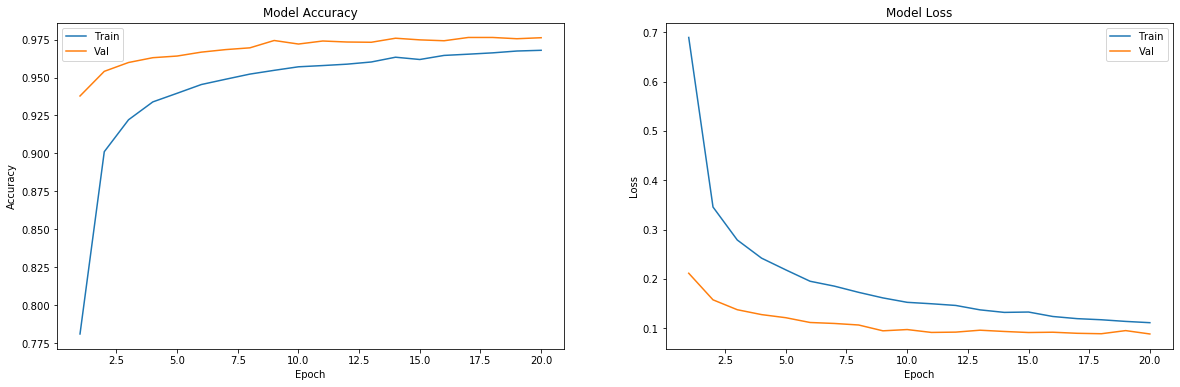

In [112]:
plt.figure(figsize=(20,6))
plt.subplot(121)
epoch_range = range(1,21)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')

plt.subplot(122)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

# MaxNorm function
- This regularization technique is quite popular for neural networks where for each neuron it constrains the weights w of the incoming connections such that w 2 ≤ r. r is the max-norm hyperparameter and 2 is the ℓ2 norm.

In [113]:
m_n = keras.constraints.MaxNorm(max_value=2, axis=0)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 300, kernel_constraint = m_n, activation = 'relu' ,input_shape = (784,),name = 'hidden1'),
  tf.keras.layers.Dense(units = 50, kernel_constraint= m_n, activation = 'relu', name = 'hidden2'), 
  tf.keras.layers.Dense(units = 10, name='ouputs') 
])

In [114]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 50)                15050     
_________________________________________________________________
ouputs (Dense)               (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['sparse_categorical_accuracy'])

In [116]:
history = model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 7s 121us/sample - loss: 0.3379 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.1491 - val_sparse_categorical_accuracy: 0.9585
Epoch 2/3
54000/54000 [==============================] - 6s 105us/sample - loss: 0.1406 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.1025 - val_sparse_categorical_accuracy: 0.9703
Epoch 3/3
54000/54000 [==============================] - 6s 106us/sample - loss: 0.0967 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9733


In [117]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.0939 - sparse_categorical_accuracy: 0.9711
